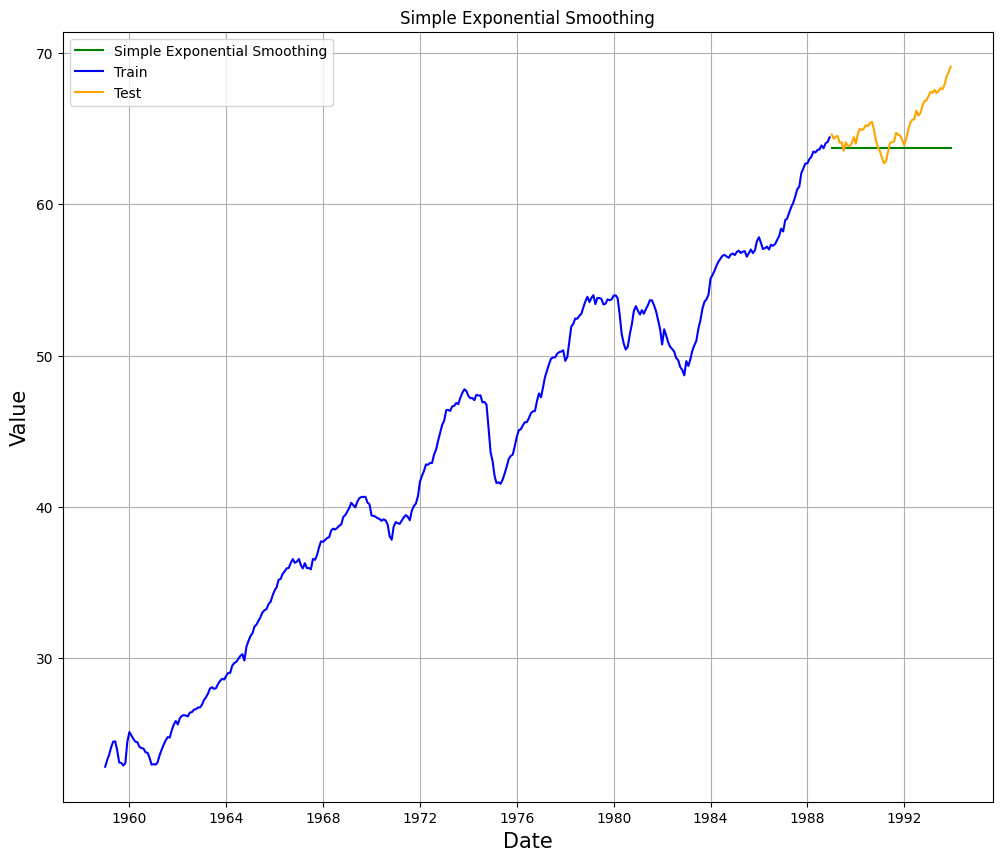

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import r2_score

plt.figure(figsize=(12, 10))
plt.xlabel("Date", size = 15)
plt.ylabel("Value", size = 15)
plt.title("Simple Exponential Smoothing")

df_train = pd.read_csv('training.csv')
df_test = pd.read_csv('testing.csv')

df_train.Date = pd.to_datetime(df_train.Date)
df_train = df_train.set_index('Date')
df_train.index.freq = 'MS'

df_test.Date = pd.to_datetime(df_test.Date)
df_test = df_test.set_index('Date')

# Рассмотрим пример с коэффициентом а = 0.2
fit = SimpleExpSmoothing(df_train).fit(smoothing_level=0.2,optimized=False)
fcast = fit.forecast(df_test.shape[0]).rename(r'$\alpha=0.2$')
plt.plot(fcast, label = "Simple Exponential Smoothing", color='green')

plt.plot(df_train, label = "Train", color = "blue")
plt.plot(df_test, label = "Test", color = "orange")

plt.grid()
plt.legend()
plt.show()

Рассмотрим участок с предсказанием поближе

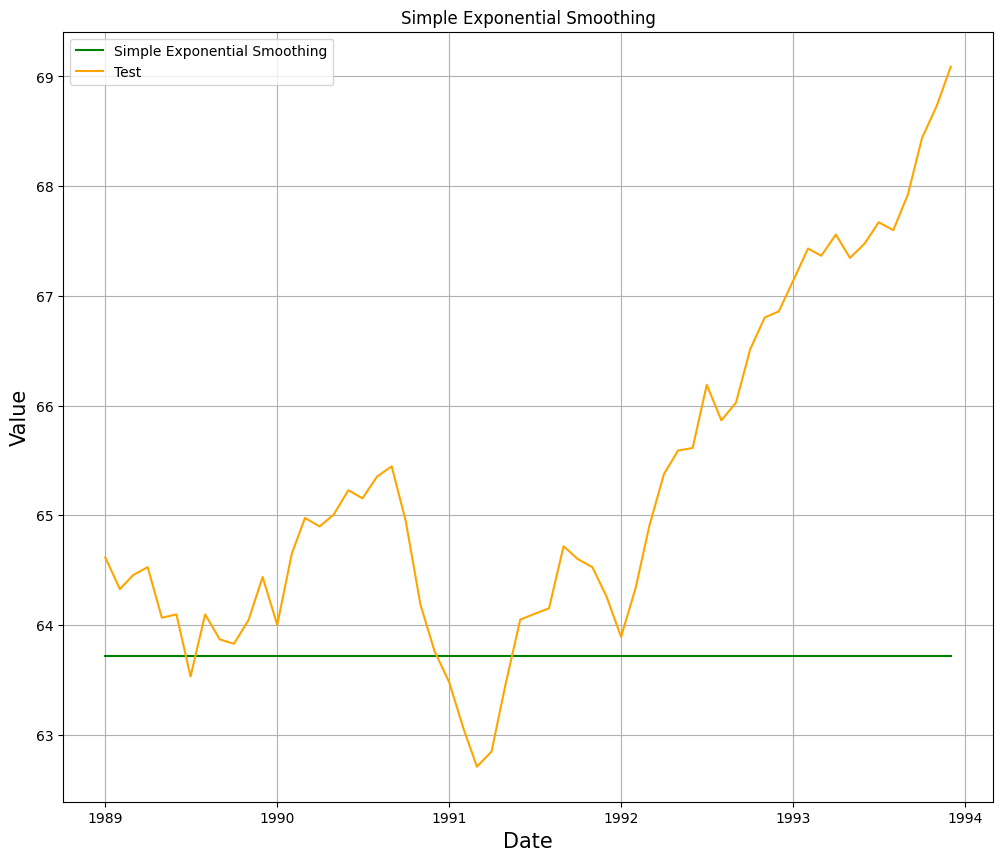

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

plt.figure(figsize=(12, 10))
plt.xlabel("Date", size = 15)
plt.ylabel("Value", size = 15)
plt.title("Simple Exponential Smoothing")

df_test = pd.read_csv('testing.csv')

df_test.Date = pd.to_datetime(df_test.Date)
df_test = df_test.set_index('Date')

# Рассмотрим пример с коэффициентом а = 0.2
fit = SimpleExpSmoothing(df_train).fit(smoothing_level=0.2,optimized=False)
fcast = fit.forecast(df_test.shape[0])
plt.plot(fcast, label = "Simple Exponential Smoothing", color='green')

plt.plot(df_test, label = "Test", color = "orange")

plt.grid()
plt.legend()
plt.show()

In [119]:
# Здесь мы пробуем менять параметр a от 0.1 до 2.0 с шагом в 0.1. Как Вы можете
# видеть, модель плохо соответствует данным, и ее предсказания хуже, чем просто
# использование среднего значения зависимой переменной.
# Нет смысла брать а > 2, т. к. значение Value устремляется к бесконечности с
# большой скоростью
fit = SimpleExpSmoothing(df_train).fit(smoothing_level=0.1,optimized=False)
fcast = fit.forecast(df_test.shape[0])
r2_max = r2_score(df_test["Value"], fcast)
for i in range(1, 20):
  fit = SimpleExpSmoothing(df_train).fit(smoothing_level=0.1*i,optimized=False)
  fcast = fit.forecast(df_test.shape[0])
  r2_max = max(r2_max, r2_score(df_test["Value"], fcast))
print(f'R^2 Max_score: {r2_max}')

R^2 Max_score: -0.016578662929653598
